# **Data Analysis of Basketball Player Performance Metrics**

In [ ]:
# install dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# change directory to google drive
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#import os
#print(os.getcwd())

In [ ]:
#print(os.listdir('/content/drive/MyDrive/'))

In [ ]:
# initialize data
data = pd.read_csv("BASKETBALL_DATA.csv")

data.head()

,month,day,player,year_born,years_played,games_played,field_goals,field_goal_attempts,3point_field_goals,3point_field_goal_attempts,...,college,team_recent,dunkattempts,championship,sex,status,height_default,height_cm,weight_kg,weight_lb
0,January,1.0,Dan Anderson,1951.0,2.0,95.0,135.0,286.0,NaN,NaN,...,USC,Portland Trail Blazers,NaN,no,male,Alive,6-2,188.0,83.0,185.0
1,January,1.0,Dan Anderson,1951.0,2.0,95.0,135.0,286.0,NaN,NaN,...,USC,Portland Trail Blazers,NaN,no,male,Alive,6-2,188.0,83.0,185.0
2,January,1.0,Chris Anstey,1975.0,3.0,155.0,303.0,734.0,4.0,29.0,...,NaN,Dallas Mavericks,45.0,no,male,Alive,7-0,213.0,112.0,249.0
3,January,1.0,Kobe Brown,2000.0,2.0,59.0,58.0,134.0,18.0,63.0,...,Missouri,Los Angeles Clippers,13.0,no,male,Alive,6-7,201.0,113.0,250.0
4,January,1.0,Jim Browne,1930.0,2.0,35.0,18.0,50.0,NaN,NaN,...,NaN,Denver Nuggets,NaN,no,male,Dead,6-10,208.0,106.0,235.0


In [ ]:
data.columns

Index(['month', 'day', 'player', 'year_born', 'years_played', 'games_played',
       'field_goals', 'field_goal_attempts', '3point_field_goals',
       '3point_field_goal_attempts', 'free_throws', 'free_throw_attempts',
       'offensive_rebounds', 'steals', 'blocks', 'turnovers', 'personal_fouls',
       'win_shares', 'field_goal_percent', '3point_field_goal_percent',
       'free_throw_percent', 'minutes_played_per_game', 'points_per_game',
       'total_rebounds_per_game', 'assists_per_game', 'points',
       'minutes_played', 'total_rebounds', 'assists', 'age', 'city', 'region',
       'position', 'college', 'team_recent', 'dunkattempts', 'championship',
       'sex', 'status', 'height_default', 'height_cm', 'weight_kg',
       'weight_lb'],
      dtype='object')

In [ ]:
data.shape;

In [ ]:
data.describe();

In [ ]:
# check for null and clean up
data.isnull().sum();

**Modeling**

1. Choose a model for problem
2. Execute and visualize the model

Problem: Using Win Shares per 48 minutes as the player performance metric, what stats influence it the most, and can we use it to gather insight on a player's value in their respective league?

In [ ]:
# dependencies
from sklearn.model_selection import train_test_split
from sklearn import linear_model as lm

In [ ]:
# add new column: WS48 (win shares per 48 minutes)
#   calculated as (win-shares/minutes-played) * 48 - for NBA
#                                             * 40 - for WNBA

data['win_share_per_game'] = np.where(
    data['sex'] == 'male',
    data['win_shares'] / data['minutes_played'] * 48,  # NBA: Scale to 48-min game
    data['win_shares'] / data['minutes_played'] * 40   # WNBA: Scale to 40-min game
)

In [ ]:
data.head()

,month,day,player,year_born,years_played,games_played,field_goals,field_goal_attempts,3point_field_goals,3point_field_goal_attempts,...,team_recent,dunkattempts,championship,sex,status,height_default,height_cm,weight_kg,weight_lb,win_share_per_game
0,January,1.0,Dan Anderson,1951.0,2.0,95.0,135.0,286.0,NaN,NaN,...,Portland Trail Blazers,NaN,no,male,Alive,6-2,188.0,83.0,185.0,0.071978
1,January,1.0,Dan Anderson,1951.0,2.0,95.0,135.0,286.0,NaN,NaN,...,Portland Trail Blazers,NaN,no,male,Alive,6-2,188.0,83.0,185.0,0.071978
2,January,1.0,Chris Anstey,1975.0,3.0,155.0,303.0,734.0,4.0,29.0,...,Dallas Mavericks,45.0,no,male,Alive,7-0,213.0,112.0,249.0,0.062309
3,January,1.0,Kobe Brown,2000.0,2.0,59.0,58.0,134.0,18.0,63.0,...,Los Angeles Clippers,13.0,no,male,Alive,6-7,201.0,113.0,250.0,0.066093
4,January,1.0,Jim Browne,1930.0,2.0,35.0,18.0,50.0,NaN,NaN,...,Denver Nuggets,NaN,no,male,Dead,6-10,208.0,106.0,235.0,NaN


In [ ]:
# view specific player
data[data['player'].str.contains('Katie Mattera')]

#data[data['ws48'] < -0.1]['minutes_played'];

,month,day,player,year_born,years_played,games_played,field_goals,field_goal_attempts,3point_field_goals,3point_field_goal_attempts,...,team_recent,dunkattempts,championship,sex,status,height_default,height_cm,weight_kg,weight_lb,win_share_per_game
7176,November,17.0,Katie Mattera,1982.0,5.0,150.0,366.0,736.0,0.0,0.0,...,Chicago Sky,0.0,no,female,Alive,6-8,203.0,108.0,240.0,0.088083


In [ ]:
data.columns

Index(['month', 'day', 'player', 'year_born', 'years_played', 'games_played',
       'field_goals', 'field_goal_attempts', '3point_field_goals',
       '3point_field_goal_attempts', 'free_throws', 'free_throw_attempts',
       'offensive_rebounds', 'steals', 'blocks', 'turnovers', 'personal_fouls',
       'win_shares', 'field_goal_percent', '3point_field_goal_percent',
       'free_throw_percent', 'minutes_played_per_game', 'points_per_game',
       'total_rebounds_per_game', 'assists_per_game', 'points',
       'minutes_played', 'total_rebounds', 'assists', 'age', 'city', 'region',
       'position', 'college', 'team_recent', 'dunkattempts', 'championship',
       'sex', 'status', 'height_default', 'height_cm', 'weight_kg',
       'weight_lb', 'ws48'],
      dtype='object')

In [ ]:
data1 = data

**Data Cleaning and Variable Creation**

In [ ]:
# remove outliers
#data1 = data1[data1['ws48'] < 4]
#data1 = data1[data1['ws48'] < 0.3]
#data1 = data1[data1['ws48'] > -2]
#data1 = data1[data1['ws48'] > -0.3]

data1 = data1[data1['minutes_played'] >= 1000]

In [ ]:
# assign appropriate variables as ratios
data1['steals_pg'] = data1['steals'] / data1['games_played']
data1['blocks_pg'] = data1['blocks'] / data1['games_played']
data1['turnovers_pg'] = data1['turnovers'] / data1['games_played']
data1['personal_fouls_pg'] = data1['personal_fouls'] / data1['games_played']
# drop na values
data1 = data1.dropna(subset=['steals_pg', 'blocks_pg', 'turnovers_pg', 'personal_fouls_pg', 'win_share_per_game']);

In [ ]:
x_var = 'turnovers_pg'

*Test plot to view shape of our data*

In [ ]:
# clean data for this problem

data1 = data1.dropna(subset=['win_share_per_game', x_var])
# assign vars
X = np.array(data1[x_var])
Y = np.array(data1['win_share_per_game'])

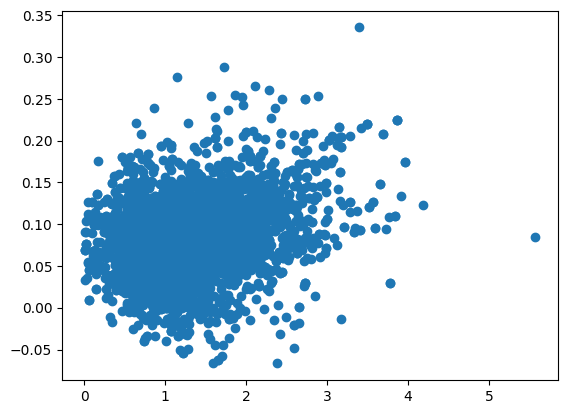

In [ ]:
# plot
plt.scatter(X,Y);

In [ ]:
data1[data1['win_share_per_game'] > 0.3].T

,2352
month,April
day,14.0
player,Cynthia Cooper
year_born,1963.0
years_played,5.0
games_played,124.0
field_goals,802.0
field_goal_attempts,1749.0
3point_field_goals,239.0
3point_field_goal_attempts,634.0


In [ ]:
data1.columns

Index(['month', 'day', 'player', 'year_born', 'years_played', 'games_played',
       'field_goals', 'field_goal_attempts', '3point_field_goals',
       '3point_field_goal_attempts', 'free_throws', 'free_throw_attempts',
       'offensive_rebounds', 'steals', 'blocks', 'turnovers', 'personal_fouls',
       'win_shares', 'field_goal_percent', '3point_field_goal_percent',
       'free_throw_percent', 'minutes_played_per_game', 'points_per_game',
       'total_rebounds_per_game', 'assists_per_game', 'points',
       'minutes_played', 'total_rebounds', 'assists', 'age', 'city', 'region',
       'position', 'college', 'team_recent', 'dunkattempts', 'championship',
       'sex', 'status', 'height_default', 'height_cm', 'weight_kg',
       'weight_lb', 'ws48', 'steals_pg', 'blocks_pg', 'turnovers_pg',
       'personal_fouls_pg'],
      dtype='object')

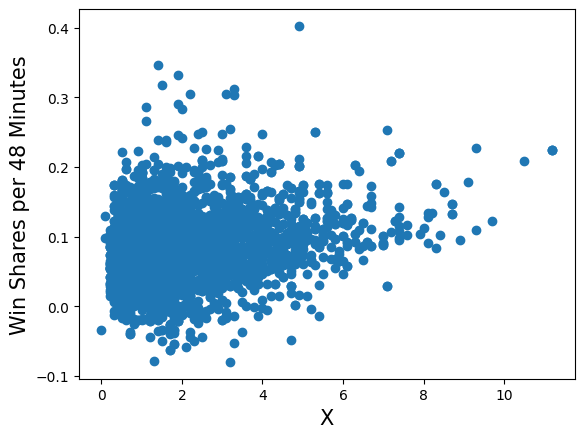

In [ ]:
# test plot, see different variable relationships
X = np.array(data1[x_var])
Y = np.array(data1['ws48'])

plt.scatter(X,Y)
plt.xlabel('X', size=15)
plt.ylabel('Win Shares per 48 Minutes', size=15);

**Create and Visualize Models**

Linear

In [ ]:
# specify linear model
lin = lm.LinearRegression()

# fit linear model to data
lin.fit(X[:, np.newaxis], Y)

# print the fitted model
lin.coef_, lin.intercept_

(array([0.0199636]), np.float64(0.05733016223583312))

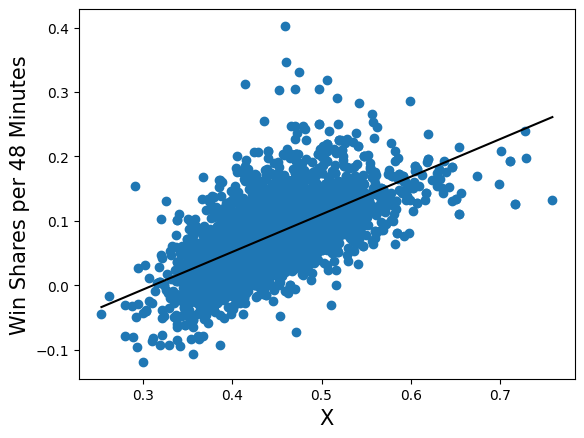

In [ ]:
xlin = np.linspace(min(X), max(X), 100)
ylin = lin.intercept_ + lin.coef_ * xlin

plt.scatter(X,Y)
plt.plot(xlin, ylin, color='black')
plt.xlabel('X', size=15)
plt.ylabel('Win Shares per 48 Minutes', size=15);

Ridge

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[:, np.newaxis])

alphas = [ x for x in range(1,101)]

ridge_cv = lm.RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_scaled, Y)

print("Alpha: ", ridge_cv.alpha_)
print("Coef: ", ridge_cv.coef_)
print("Intercept: ", ridge_cv.intercept_)

Alpha:  12
Coef:  [0.01510815]
Intercept:  0.08011832551821015


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


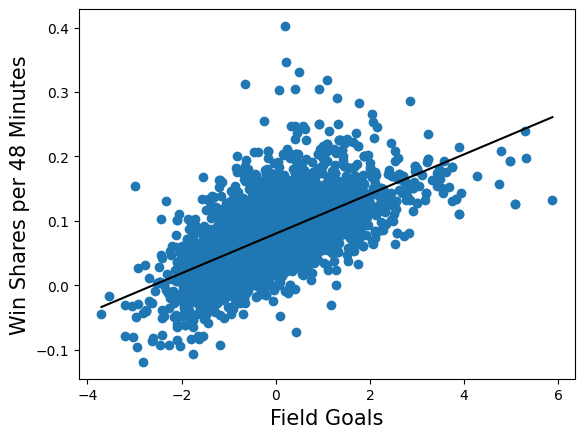

In [ ]:
xlin = np.linspace(min(X_scaled), max(X_scaled), 100)
ylin = ridge_cv.intercept_ + ridge_cv.coef_ * xlin

plt.scatter(X_scaled,Y)
plt.plot(xlin, ylin, color='black')
plt.xlabel('Field Goals', size=15)
plt.ylabel('Win Shares per 48 Minutes', size=15);

LassoCV

In [ ]:
# set up model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[:, np.newaxis])

lasso_cv = lm.LassoCV(alphas=None, cv=5, max_iter=10000, random_state=42)

lasso_cv.fit(X_scaled, Y)

LassoCV(cv=5, max_iter=10000, random_state=42)

In [ ]:
print("Alpha: ", lasso_cv.alpha_)
print("Coef: ", lasso_cv.coef_)
print("Intercept: ", lasso_cv.intercept_)

Alpha:  3.081344564860433e-05
Coef:  [0.03078263]
Intercept:  0.08011832551821016


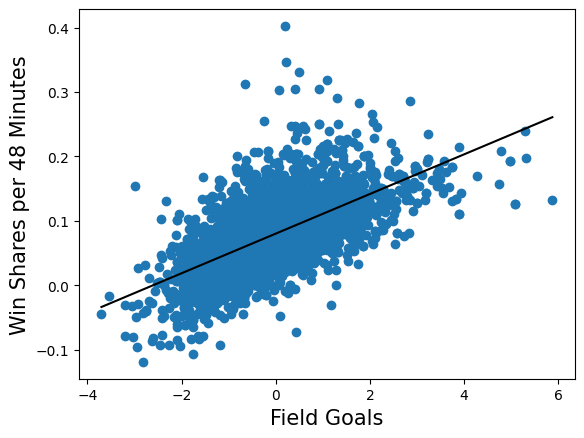

In [ ]:
# visualize model
xlin = np.linspace(min(X_scaled), max(X_scaled), 100)
ylin = lasso_cv.intercept_ + lasso_cv.coef_ * xlin

plt.scatter(X_scaled,Y)
plt.plot(xlin, ylin, color='black')
plt.xlabel('Field Goals', size=15)
plt.ylabel('Win Shares per 48 Minutes', size=15);

Huber

In [ ]:
# Huber Model
huber = lm.HuberRegressor()
huber.fit(X[:, np.newaxis], Y)

print(huber.coef_, huber.intercept_)

[0.57473424] -0.17957030714782576


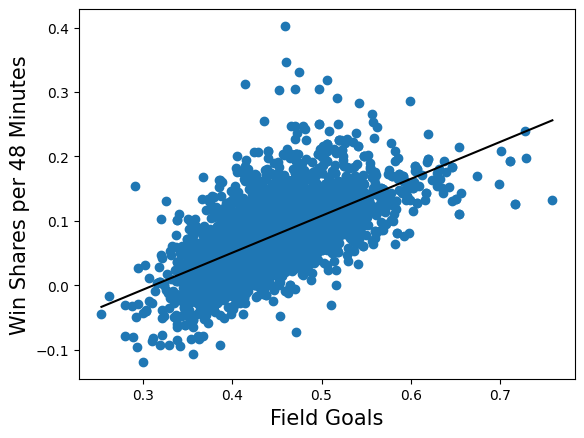

In [ ]:
xlin = np.linspace(min(X), max(X), 100)
ylin = huber.intercept_ + huber.coef_ * xlin

plt.scatter(X,Y)
plt.plot(xlin, ylin, color='black')
plt.xlabel('Field Goals', size=15)
plt.ylabel('Win Shares per 48 Minutes', size=15);

**Validate the Model**

In [ ]:
from sklearn.model_selection import cross_val_score

# we have X and Ys defined, redefine for clarity
X = np.array(data1['field_goals'])
X = X[:, np.newaxis]
Y = np.array(data1['ws48'])

scores = -cross_val_score(lin, X, Y, scoring="neg_mean_squared_error", cv=8)
print("Linear: ", sum(scores) / len(scores))
scores = -cross_val_score(huber, X, Y, scoring="neg_mean_squared_error", cv=8)
print("Huber: ", sum(scores) / len(scores))

scores = -cross_val_score(lasso_cv, X_scaled, Y, scoring="neg_mean_squared_error", cv=8)
print("Lasso: ", sum(scores) / len(scores))
scores = -cross_val_score(ridge_cv, X_scaled, Y, scoring="neg_mean_squared_error", cv=8)
print("Ridge: ", sum(scores) / len(scores))

Linear:  0.0019147098260401164
Huber:  0.0019181192624652347
Lasso:  0.001586011650033756


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1

Ridge:  0.0015860217995938913


# **Multiple Linear Regression**

In [ ]:
 from sklearn.model_selection import train_test_split

In [ ]:
data1.columns

Index(['month', 'day', 'player', 'year_born', 'years_played', 'games_played',
       'field_goals', 'field_goal_attempts', '3point_field_goals',
       '3point_field_goal_attempts', 'free_throws', 'free_throw_attempts',
       'offensive_rebounds', 'steals', 'blocks', 'turnovers', 'personal_fouls',
       'win_shares', 'field_goal_percent', '3point_field_goal_percent',
       'free_throw_percent', 'minutes_played_per_game', 'points_per_game',
       'total_rebounds_per_game', 'assists_per_game', 'points',
       'minutes_played', 'total_rebounds', 'assists', 'age', 'city', 'region',
       'position', 'college', 'team_recent', 'dunkattempts', 'championship',
       'sex', 'status', 'height_default', 'height_cm', 'weight_kg',
       'weight_lb', 'win_share_per_game', 'steals_pg', 'blocks_pg',
       'turnovers_pg', 'personal_fouls_pg'],
      dtype='object')

In [ ]:
# select appropriate columns
data2 = data1.dropna(subset=['steals','steals_pg', 'blocks', 'blocks_pg', 'turnovers', 'turnovers_pg', 'personal_fouls', 'personal_fouls_pg',\
                         'field_goal_percent', '3point_field_goal_percent', 'free_throw_percent',\
                         'points_per_game','total_rebounds_per_game', 'assists_per_game','height_cm','win_share_per_game', 'weight_kg', 'minutes_played_per_game', 'years_played'])

X  = data2[['steals_pg', 'blocks_pg', 'turnovers_pg', 'personal_fouls_pg', \
                         'field_goal_percent', '3point_field_goal_percent', 'free_throw_percent',\
                         'points_per_game','total_rebounds_per_game', 'assists_per_game','height_cm','weight_kg', 'minutes_played_per_game','years_played']]
Y = data2['win_share_per_game']

In [ ]:
# standardize vars
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# train and test  for prediction, not needed for inference
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [ ]:
multlin = lm.LinearRegression()
multlin.fit(X_scaled, Y)

multlin2 = lm.LinearRegression()
multlin2.fit(X, Y)

alphas = [ x for x in range(1,101)]
ridge_cv = lm.RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_scaled, Y)

ridge_cv2 = lm.RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv2.fit(X, Y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


RidgeCV(alphas=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
                19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
        store_cv_values=True)

Results for Linear Regression

In [ ]:
# R² score (how well model fits)
print("R^2 Score Linear:", format(multlin.score(X_scaled, Y), "0.2f") )

# Coefficients
coef = pd.Series(multlin.coef_, index=X.columns)
print("Coefficients:\n", coef)

# Intercept
print("Intercept:", multlin.intercept_)

R^2 Score Linear: 0.74
Coefficients:
 steals_pg                    0.010737
blocks_pg                    0.004670
turnovers_pg                -0.022086
personal_fouls_pg            0.001431
field_goal_percent           0.022059
3point_field_goal_percent    0.002870
free_throw_percent           0.009652
points_per_game              0.016866
total_rebounds_per_game      0.021892
assists_per_game             0.009988
height_cm                   -0.009527
weight_kg                   -0.000568
minutes_played_per_game     -0.016816
years_played                 0.010299
dtype: float64
Intercept: 0.08191642229453917


In [ ]:
# R² score (how well model fits)
print("R^2 Score Linear:", format(multlin2.score(X, Y), "0.2f") )

# Coefficients
coef = pd.Series(multlin2.coef_, index=X.columns)
print("Coefficients:\n", coef)

# Intercept
print("Intercept:", multlin2.intercept_)

R^2 Score Linear: 0.74
Coefficients:
 steals_pg                    0.030088
blocks_pg                    0.011356
turnovers_pg                -0.035126
personal_fouls_pg            0.002404
field_goal_percent           0.435143
3point_field_goal_percent    0.024194
free_throw_percent           0.113625
points_per_game              0.003660
total_rebounds_per_game      0.010741
assists_per_game             0.006848
height_cm                   -0.000931
weight_kg                   -0.000043
minutes_played_per_game     -0.002484
years_played                 0.002375
dtype: float64
Intercept: -0.053387317840593154


Results for Ridge Regression

In [ ]:
# R² score (how well model fits)
print("R^2 Score:", format(ridge_cv.score(X_scaled, Y), "0.2f") )\

# Coefficients
coef = pd.Series(ridge_cv.coef_, index=X.columns)
print("Coefficients:\n", coef)

# Intercept
print("Intercept:", ridge_cv.intercept_)

#Alpha
print("Alpha: ", ridge_cv.alpha_)

R^2 Score: 0.74
Coefficients:
 steals_pg                    0.010718
blocks_pg                    0.004676
turnovers_pg                -0.021930
personal_fouls_pg            0.001376
field_goal_percent           0.022072
3point_field_goal_percent    0.002872
free_throw_percent           0.009655
points_per_game              0.016699
total_rebounds_per_game      0.021796
assists_per_game             0.009895
height_cm                   -0.009485
weight_kg                   -0.000552
minutes_played_per_game     -0.016619
years_played                 0.010284
dtype: float64
Intercept: 0.08191642229453917
Alpha:  2


In [ ]:
# R² score (how well model fits)
print("R^2 Score Linear:", format(ridge_cv2.score(X, Y), "0.2f") )

# Coefficients
coef = pd.Series(ridge_cv2.coef_, index=X.columns)
print("Coefficients:\n", coef)

# Intercept
print("Intercept:", ridge_cv2.intercept_)

R^2 Score Linear: 0.73
Coefficients:
 steals_pg                    0.029255
blocks_pg                    0.012011
turnovers_pg                -0.037707
personal_fouls_pg            0.003245
field_goal_percent           0.362147
3point_field_goal_percent    0.019080
free_throw_percent           0.101593
points_per_game              0.004183
total_rebounds_per_game      0.011315
assists_per_game             0.007585
height_cm                   -0.000899
weight_kg                   -0.000041
minutes_played_per_game     -0.002713
years_played                 0.002460
dtype: float64
Intercept: -0.018646241940829228


Validate

Compare coefficients

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


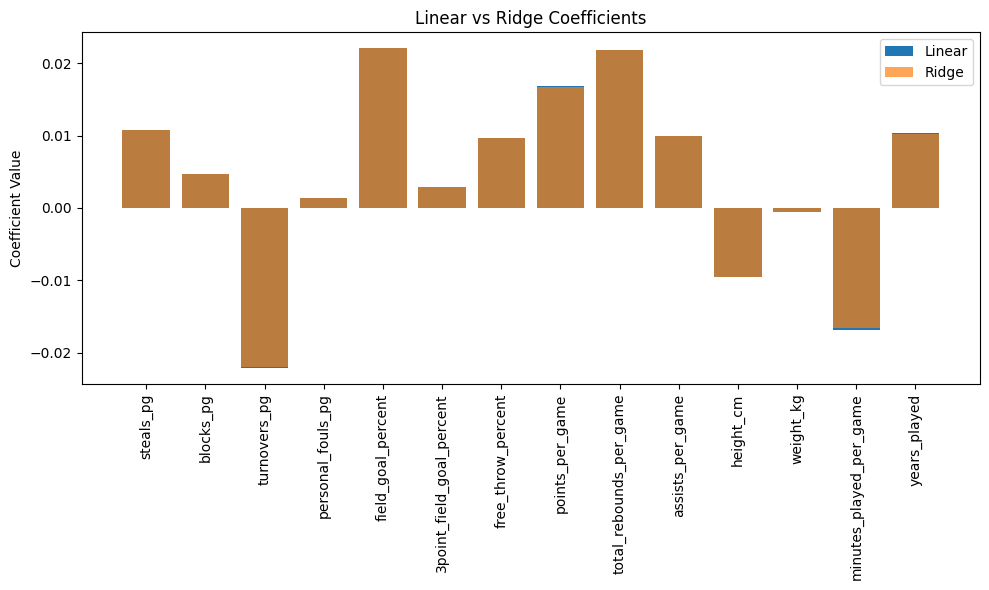

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(X.columns, multlin.fit(X_scaled, Y).coef_, label='Linear')
plt.bar(X.columns, ridge_cv.fit(X_scaled, Y).coef_, alpha=0.7, label='Ridge')


plt.xticks(rotation=90)
plt.ylabel("Coefficient Value")
plt.title("Linear vs Ridge Coefficients")
plt.legend()
plt.tight_layout()
plt.show()

LinearRegression() seems to work the best and no significant difference is visualized.

In [ ]:
lincoef = multlin.coef_
ridgecoef = ridge_cv.coef_

lincoef - ridgecoef

array([ 1.89213486e-05, -6.57338006e-06, -1.56628265e-04,  5.43814295e-05,
       -1.34644462e-05, -2.38338120e-06, -2.87604818e-06,  1.66844037e-04,
        9.55726438e-05,  9.35056290e-05, -4.19438112e-05, -1.63991720e-05,
       -1.97418269e-04,  1.52815320e-05])

In [ ]:


scores = -cross_val_score(multlin, X_scaled, Y, scoring="neg_mean_squared_error", cv=8)
print("Multi Linear: ", sum(scores) / len(scores))
#scores = -cross_val_score(huber, X_scaled, Y, scoring="neg_mean_squared_error", cv=8)
#print("Huber: ", sum(scores) / len(scores))

#scores = -cross_val_score(lasso_cv, X_scaled, Y, scoring="neg_mean_squared_error", cv=8)
#print("Lasso: ", sum(scores) / len(scores))
scores = -cross_val_score(ridge_cv, X_scaled, Y, scoring="neg_mean_squared_error", cv=8)
print("Ridge: ", sum(scores) / len(scores))

Multi Linear:  0.0005576207431867875


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1

Ridge:  0.0005576223665899394


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


Plot it

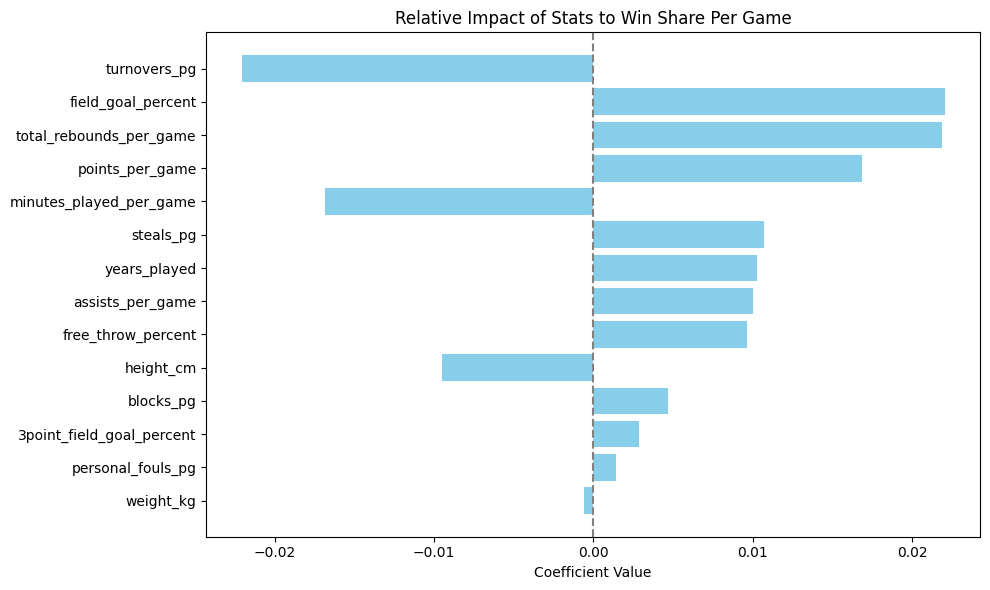

In [ ]:
# Get coefficients
coefs = multlin.coef_

# Create a DataFrame for plotting
coef_df = pd.DataFrame({
    'Stat': X.columns,
    'Coefficient': coefs
})

# Sort by absolute value (only for ordering)
coef_df['AbsCoefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.barh(coef_df['Stat'], coef_df['Coefficient'], color='skyblue')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Relative Impact of Stats to Win Share Per Game')
plt.xlabel('Coefficient Value')
plt.gca().invert_yaxis()  # Largest at top
plt.tight_layout()
#plt.yticks(ticks=range(len(stats)), labels=['A', 'B', 'C', 'D', 'E'])
plt.show()



*Each statistics' influence on win share per game can be visualized. Note this is for all players in NBA, ABA, and WNBA*

**Let's look at it separated by league to gain insight into male and female leagues**

In [ ]:
# assign nba and aba dataset
male_data = data2[data2['sex'] == 'male']

# assign wnba dataset
female_data = data2[data2['sex'] == 'female']

*NBA and ABA*

In [ ]:
# assign vars
Xm = male_data[['steals_pg', 'blocks_pg', 'turnovers_pg', 'personal_fouls_pg', \
                         'field_goal_percent', '3point_field_goal_percent', 'free_throw_percent',\
                         'points_per_game','total_rebounds_per_game', 'assists_per_game','height_cm','weight_kg', 'minutes_played_per_game','years_played']]
Ym = male_data['win_share_per_game']

# standardize vars
scaler = StandardScaler()
Xm_scaled = scaler.fit_transform(Xm)

# make model
linM = lm.LinearRegression()

# fit linear model to data
linM.fit(Xm_scaled, Ym)

# print the fitted model
linM.coef_, linM.intercept_

(array([ 0.00780842,  0.00214423, -0.02988522,  0.00193774,  0.02069932,
         0.00178669,  0.00825231,  0.02199617,  0.01867274,  0.02036424,
        -0.00062755,  0.00196175, -0.01840214,  0.01187304]),
 np.float64(0.08134895954381148))

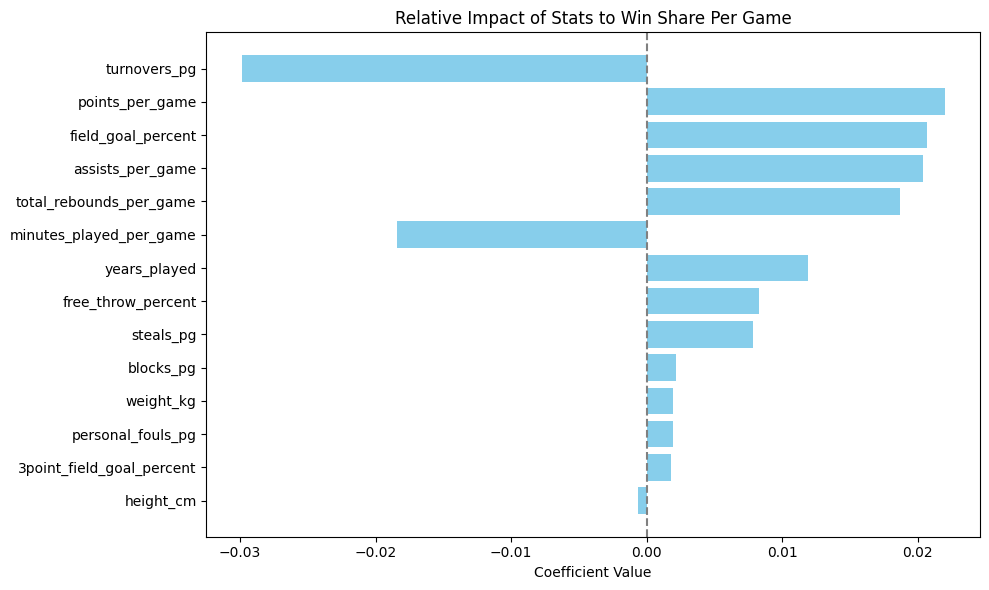

In [ ]:
# Get coefficients
coefsM = linM.coef_

# Create a DataFrame for plotting
coef_dfM = pd.DataFrame({
    'Stat': Xm.columns,
    'Coefficient': coefsM
})

# Sort by absolute value (only for ordering)
coef_dfM['AbsCoefficient'] = np.abs(coef_dfM['Coefficient'])
coef_dfM = coef_dfM.sort_values(by='AbsCoefficient', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.barh(coef_dfM['Stat'], coef_dfM['Coefficient'], color='skyblue')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Relative Impact of Stats to Win Share Per Game')
plt.xlabel('Coefficient Value')
plt.gca().invert_yaxis()  # Largest at top
plt.tight_layout()
#plt.yticks(ticks=range(len(stats)), labels=['A', 'B', 'C', 'D', 'E'])
plt.show()

*WNBA*

In [ ]:
# assign vars
Xf = female_data[['steals_pg', 'blocks_pg', 'turnovers_pg', 'personal_fouls_pg', \
                         'field_goal_percent', '3point_field_goal_percent', 'free_throw_percent',\
                         'points_per_game','total_rebounds_per_game', 'assists_per_game','height_cm','weight_kg', 'minutes_played_per_game','years_played']]
Yf = female_data['win_share_per_game']

# standardize vars
scaler = StandardScaler()
Xf_scaled = scaler.fit_transform(Xf)

# make model
linF = lm.LinearRegression()

# fit linear model to data
linF.fit(Xf_scaled, Yf)

# print the fitted model
linF.coef_, linF.intercept_

(array([ 0.02086737,  0.00638119, -0.02329474,  0.00131398,  0.02300674,
         0.00429014,  0.00872147,  0.01994677,  0.00839173,  0.00756524,
        -0.00039675,  0.00339297, -0.00305793,  0.00297432]),
 np.float64(0.0857690009261102))

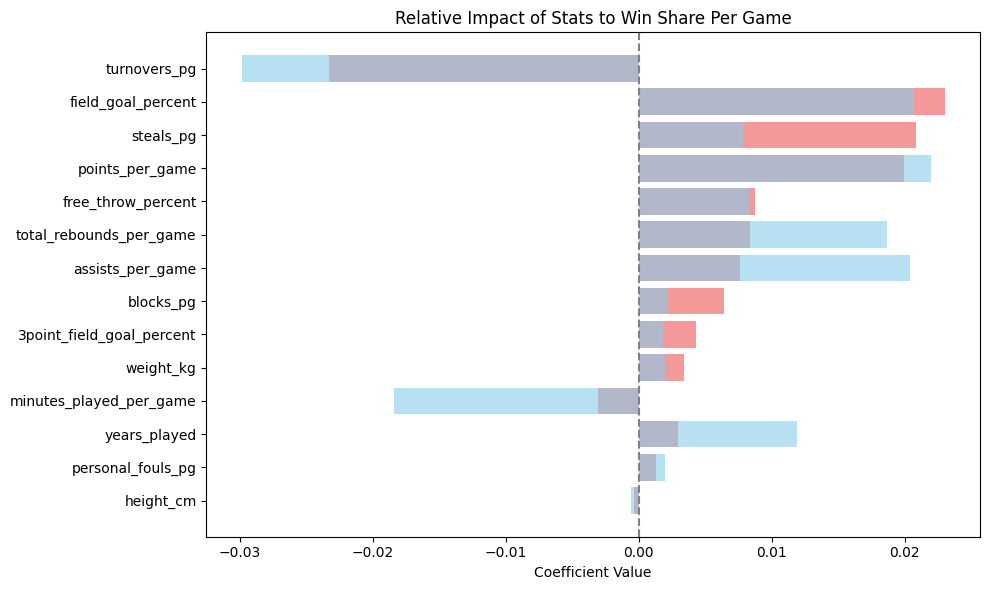

In [ ]:
# Get coefficients
coefsF = linF.coef_

# Create a DataFrame for plotting
coef_dfF = pd.DataFrame({
    'Stat': Xf.columns,
    'Coefficient': coefsF
})

y_pos = np.arange(len(Xf))
offset = 0.2

# Sort by absolute value (only for ordering)
coef_dfF['AbsCoefficient'] = np.abs(coef_dfF['Coefficient'])
coef_dfF = coef_dfF.sort_values(by='AbsCoefficient', ascending=False)

plt.figure(figsize=(10, 6))
barsF = plt.barh(coef_dfF['Stat'], coef_dfF['Coefficient'], color='lightcoral', alpha = 0.8)
barsM = plt.barh(coef_dfM['Stat'], coef_dfM['Coefficient'], color='skyblue', alpha = 0.6)
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Relative Impact of Stats to Win Share Per Game')
plt.xlabel('Coefficient Value')
plt.gca().invert_yaxis()  # Largest at top
plt.tight_layout()
#plt.yticks(ticks=range(len(stats)), labels=['A', 'B', 'C', 'D', 'E'])
plt.show()

*Combine both graphs together to view relative impact of variables in male vs. female leagues*

The discrepancies visualized is attributed to the fact that games in the WNBA are slower and have fewer possessions per game. Stealing the ball and obtaining a possession for your team in an environment where possessions are rarer will be more valuable than if possessions were more common. The other differences can be explained by the differences in the flow of the game in the male vs. female leagues. Can we use this to draft players specifically to cater to these visualizations?